In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.bipartite import color

In [3]:
dataset = pd.read_csv('D:/Python/Artificial Neural Networks/Self-Organizing Map (SOM)/Data/Credit_Card_Applications.csv')

In [4]:
dataset.tail(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
671,15711759,1,22.67,2.540,1,8,8,2.585,1,0,0,0,2,0,1,1
672,15615296,0,17.92,10.210,2,1,1,0.000,0,0,0,0,2,0,51,0
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1
674,15788634,0,25.75,0.500,2,8,8,0.875,1,0,0,1,2,491,1,1
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0
676,15618258,0,22.75,6.165,2,6,4,0.165,0,0,0,0,2,220,1001,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0
679,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1


In [5]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [6]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [8]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from minisom import MiniSom
som = MiniSom(x = 20 , y = 20 , input_len = 15 , sigma = 1.0 , learning_rate = 1.0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 500)

#find winner

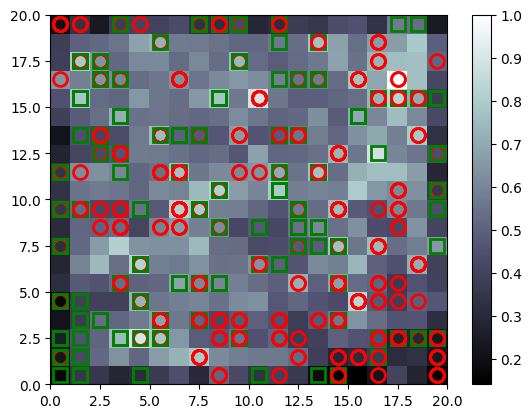

In [10]:
from pylab import bone, pcolor, colorbar, plot, show

# Visualizing the SOM
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Loop through each input data point
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor=colors[y[i]], 
         markerfacecolor='None', 
         markersize=10, 
         markeredgewidth=2)

show()


In [12]:
mappings = som.win_map(X)

# ตรวจสอบว่ามีข้อมูลในตำแหน่ง (0, 4) หรือไม่
if (0, 4) in mappings and len(mappings[(0, 4)]) > 0:
    # รวมข้อมูลในตำแหน่ง (0, 4)
    frauds = np.concatenate(mappings[(0, 4)], axis=0)  # ใช้ axis=0 หรือไม่ระบุ axis

    # ปรับให้ข้อมูลเป็นรูปแบบ 2D
    frauds = frauds.reshape(-1, X.shape[1])

    # แปลงข้อมูลกลับสู่ขนาดต้นฉบับ
    frauds = sc.inverse_transform(frauds)
    print(frauds)
else:
    print("ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM")



[[1.5704081e+07 1.0000000e+00 2.5170000e+01 3.5000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 6.2500000e-01 1.0000000e+00 1.0000000e+00
  7.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 7.0600000e+03]
 [1.5722479e+07 1.0000000e+00 2.0670000e+01 5.2900000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 3.7500000e-01 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5733602e+07 1.0000000e+00 2.1830000e+01 1.1000000e+01 2.0000000e+00
  1.4000000e+01 4.0000000e+00 2.9000000e-01 1.0000000e+00 1.0000000e+00
  6.0000000e+00 0.0000000e+00 2.0000000e+00 1.2100000e+02 1.0000000e+00]
 [1.5693382e+07 1.0000000e+00 2.2580000e+01 1.0040000e+01 2.0000000e+00
  1.4000000e+01 4.0000000e+00 4.0000000e-02 1.0000000e+00 1.0000000e+00
  9.0000000e+00 0.0000000e+00 2.0000000e+00 6.0000000e+01 3.9700000e+02]]


หา oulier ตรงสี ขาว ว่าได้ค่าเท่าไหร่

In [13]:
# สร้าง mappings ของแต่ละเซลล์ใน SOM
mappings = som.win_map(X)
outliers = []

# ตรวจจับ Outliers โดยหาค่าที่มีจำนวนข้อมูลเพียง 1 ค่าในเซลล์นั้น
for coord, values in mappings.items():
    if len(values) == 1:  # เซลล์ที่มีค่าเดียวถือว่าเป็น Outlier
        outliers.append(values[0])

# แปลง outliers จาก numpy array กลับเป็น DataFrame เพื่อตรวจสอบ CustomerID
outlier_indices = [i for i, x in enumerate(X) if np.any(np.all(x == outlier, axis=1) for outlier in outliers)]
outlier_ids = dataset.iloc[outlier_indices, 0].values  # ดึง CustomerID จาก index ที่เป็น outliers

# แสดงผล CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข
print("CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:")
print(outlier_ids)

# สรุปจำนวน Outliers
num_outliers = len(outlier_ids)
print(f"จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: {num_outliers} คน")


CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:
[15776156 15739548 15662854 15687688 15715750 15571121 15726466 15660390
 15663942 15638610 15644446 15585892 15609356 15803378 15599440 15692408
 15683168 15790254 15767729 15768600 15699839 15786237 15694530 15796813
 15605791 15714087 15711446 15588123 15748552 15618410 15672432 15610042
 15580914 15583680 15813718 15767264 15686461 15678882 15789611 15668679
 15631685 15655658 15753591 15617348 15704581 15738487 15648069 15737627
 15731586 15757467 15597709 15720529 15596797 15681755 15815271 15682860
 15621546 15705918 15684512 15671769 15642934 15594305 15789201 15706762
 15766183 15777994 15568162 15680643 15761854 15730793 15692137 15608595
 15709459 15775750 15585855 15752139 15768295 15766906 15725776 15682576
 15704081 15719940 15672894 15667451 15636767 15571415 15575605 15649160
 15615832 15600975 15690772 15565714 15763108 15723884 15644453 15655464
 15783883 15787693 15664793 15642391 15756538 15668830 15796569 15677112
 158